In [1]:
import pandas as pd
import random
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = 'retina'

In [2]:
# Download the dataset once
if not os.path.exists('fakenet_dataset'):
    !aws s3 cp s3://danylo-ucla/fakenet_dataset.zip ./
    !unzip fakenet_dataset.zip >/dev/null

In [3]:
!tree -L 2 fakenet_dataset

fakenet_dataset
├── score
│   ├── images
│   └── metadata.csv
└── train
    ├── images
    └── metadata.csv

4 directories, 2 files


## Training Images and Metadata

In [4]:
train_metadata = pd.read_csv('fakenet_dataset/train/metadata.csv')

In [5]:
train_metadata.head()

,file_name_training,file_name_generated,caption
0,ffd603965b2eb89bfa6e7bda19c903f9.jpg,d70026e562baeb2976d33ea72bbe2af2.jpg,a toilet with a green and white door and green...
1,c5e15bda1013a6a8c28b87d23aa94767.jpg,41c055de712d74957659ab5d901c4212.jpg,An older couple embracing each other next to a...
2,517547ba7695808a52ecd2e2f4b6faf7.jpg,aab1106eb9793b08b665902c74c8e0cf.jpg,"A square glazed doughnut, and a chocolate doug..."
3,c3ff13909de96ed069fb2769800ea4b9.jpg,0658524e5dc4058fe7ceff0a72dbda18.jpg,A large bathroom with tiled floor and big mirror
4,2b5c6c916a7110287f7193081906cc5e.jpg,8546adea5c43ea5e517abfa5208aa10d.jpg,A man riding a snowboard down a conveyor belt.


In [6]:
random.seed(43)

([], [])

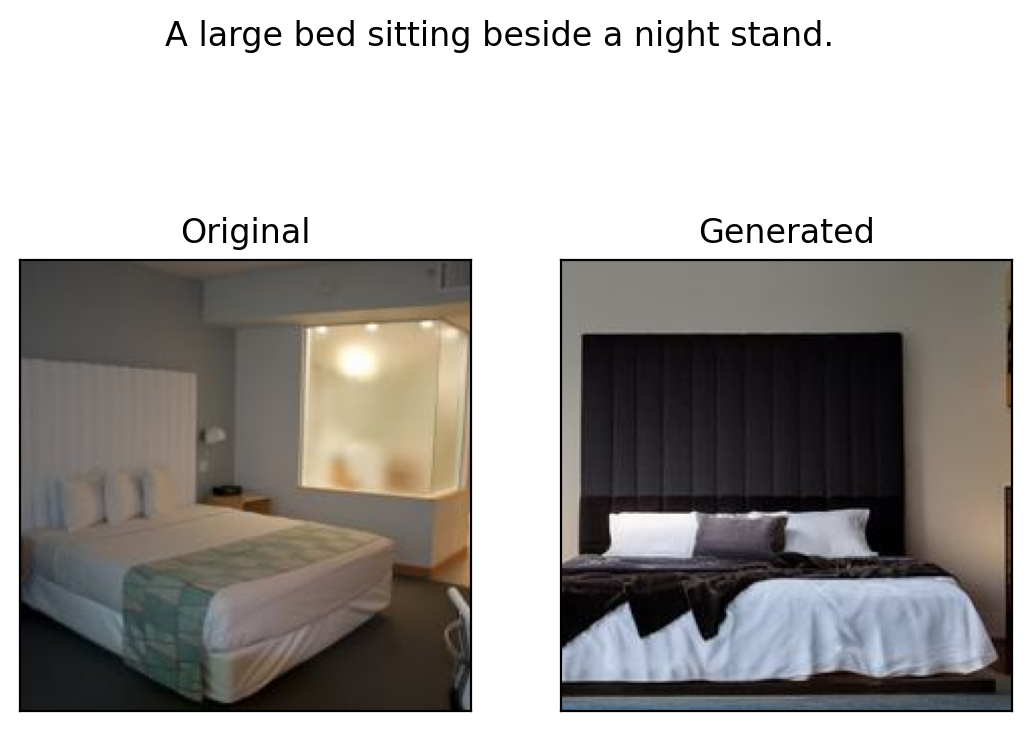

In [7]:
i = random.randint(0, train_metadata.shape[0])

file_name_training = train_metadata['file_name_training'].iloc[i]
file_name_generated = train_metadata['file_name_generated'].iloc[i]
caption = train_metadata['caption'].iloc[i]

plt.suptitle(caption)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(Image.open(f'fakenet_dataset/train/images/{file_name_training}'))
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('Generated')
plt.imshow(Image.open(f'fakenet_dataset/train/images/{file_name_generated}'))
plt.xticks([])
plt.yticks([])

## Score Images and Metadata

In [8]:
score_metadata = pd.read_csv('fakenet_dataset/score/metadata.csv')
score_metadata

,file_name_a,file_name_b,caption
0,7ad84509c9b0226bc0288537a8ab22ae.jpg,798d20e113a6bde4525336ce66a84a69.jpg,A couple of motorcycles parked next to each ot...
1,a4a39968e428b3c82257e25920e3adeb.jpg,2d6c056b045062c97450a29dd83d8c63.jpg,A vase with a bird on it and a matching winegl...
2,38ffec577b2c097f3a3403ae6c6638b8.jpg,050d2c637cbfa509f9a0072d6ca422b5.jpg,a man that is surfing on some water
3,07ecbbbc269ba1bd2d5b792f9abea0ed.jpg,23cbc59d33f061d2930f27c641a01807.jpg,A crowd of young people sanding on a snow cove...
4,10c585ad69ed895ac1a3b58d5dfb256a.jpg,7bbe5ae59f098437099f5ba093c2b38b.jpg,"A kitchen with a refrigerator, counter and was..."
...,...,...,...
2811,1541d399a4be2e0c85ef061e6bddb60c.jpg,15e819f3f3ede6e2e20170d71185031d.jpg,a close up of a person wearing a suit and tie
2812,d1bc62f2b725409f46421219f16383df.jpg,06f2ad1c20ed610523d677e3cbb8fed6.jpg,Zebras eat from a trough set up in their zoo e...
2813,7015aa30ddb1d1605c6822d2856e98db.jpg,846bd374ab91c40386fa48c1f5fdef78.jpg,A group of people on a field with a Frisbee.
2814,3b76a717ad707699851465a0680f5798.jpg,f5a5c27c396aae7142805befc710f9ac.jpg,A boy sitting at a table eating food with food...


## Tensorflow Dataset (Paired Images, Labeled Segment)

In [9]:
from collegium.m04_gan.fakenet_dataset import build_dataset_labeled_paired

train_paired_dataset = build_dataset_labeled_paired(train_metadata).batch(16)

(model_input_a, model_input_b), model_output = next(iter(train_paired_dataset))

display(model_input_a.shape, model_input_b.shape, model_output.shape)

I0000 00:00:1728172670.566679  110073 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728172670.621511  110073 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728172670.624551  110073 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728172670.628949  110073 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

TensorShape([16, 224, 224, 3])

TensorShape([16, 224, 224, 3])

TensorShape([16, 1])

In [10]:
from collegium.m04_gan.fakenet_dataset import build_dataset_score_paired


score_paired_dataset = build_dataset_score_paired().batch(16)

((model_input_a, model_input_b),) = next(iter(score_paired_dataset))

display(model_input_a.shape, model_input_b.shape)

TensorShape([16, 224, 224, 3])

TensorShape([16, 224, 224, 3])

In [11]:
# See Keras Functional API
# https://keras.io/guides/functional_api/

inputs = [
    tf.keras.layers.Input((224, 224, 3)),
    tf.keras.layers.Input((224, 224, 3)),
]

# Example of reusing the same layer twice.
# A Model object (e.g. a pre-trained model) can also be used multiple times.
dense = tf.keras.layers.Dense(1)
outputs = [
    dense(inputs[0]),
    dense(inputs[1]),
]

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
outputs = tf.keras.layers.GlobalAveragePooling2D()(outputs)
outputs = tf.keras.layers.Flatten()(outputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(outputs)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.compile('sgd', 'binary_crossentropy')
model.fit(train_paired_dataset)
score_y_hat = model.predict(score_paired_dataset)


/app/conda/envs/collegium/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(
I0000 00:00:1728172672.282554  110236 service.cc:146] XLA service 0x71a804016f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728172672.282590  110236 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5


      6/Unknown 1s 27ms/step - loss: 77.1604

I0000 00:00:1728172672.941724  110236 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - loss: 9.9174


/app/conda/envs/collegium/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/app/conda/envs/collegium/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


/app/conda/envs/collegium/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 224, 224,  │          4 │ input_layer[0][0… │
│                     │ 1)                │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 224, 224,  │          0 │ dense[0][0],      │
│ (Concatenate)       │ 2)                │            │ dense[1][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2)         │          0 │ concatenate[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2)         │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │          3 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

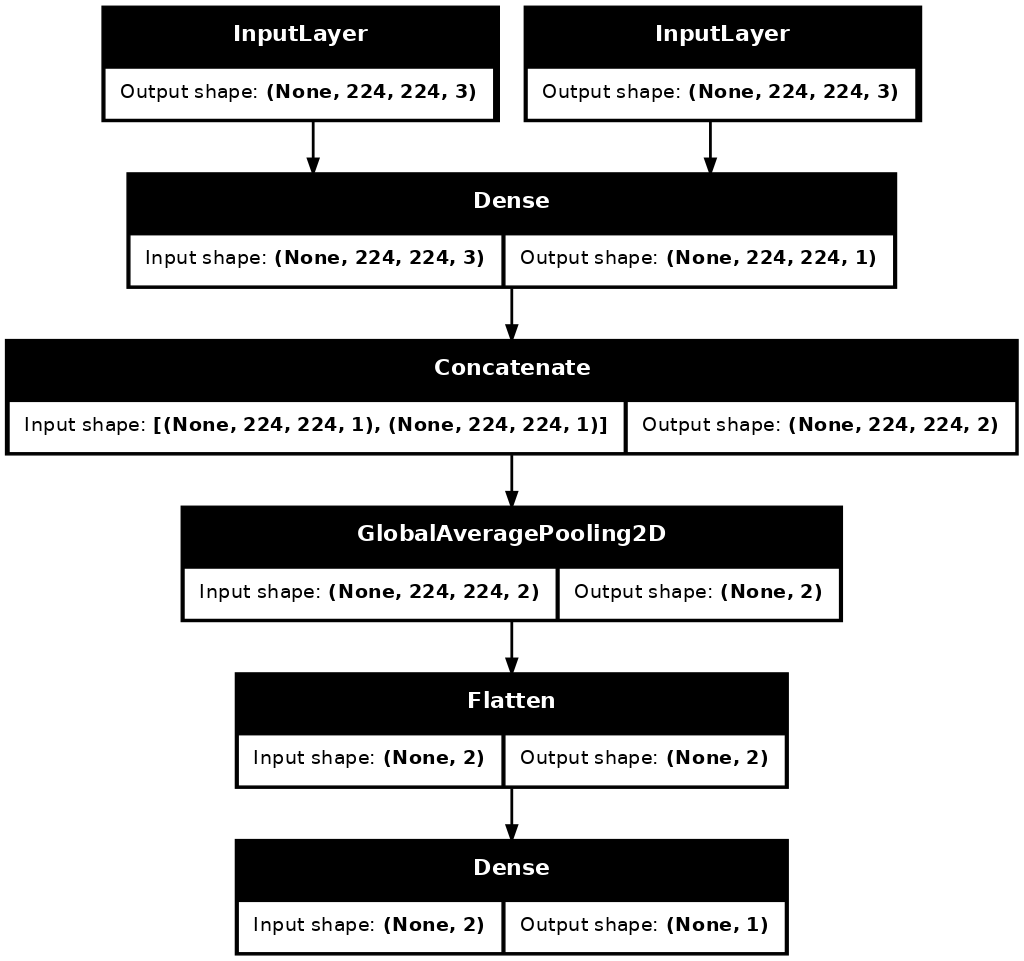

In [13]:
plot = tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    dpi=100,
)
!rm model.png
plot

In [14]:
# The expected model output for the score segment is a DataFrame with 1 column -- 'probability'.
# One probability per row in the score metadata.
# The probability represents the likelihood that the image in the 'file_name_a' column is real.

# The following code can be used to check the DataFrame in 'score_y_hat':

score_y_hat = pd.DataFrame(score_y_hat, columns=['probability'])
assert score_y_hat.shape == (score_metadata.shape[0], 1)
assert score_y_hat.probability.dtype == np.float32
assert score_y_hat.probability.min() >= 0
assert score_y_hat.probability.max() <= 1

In [15]:
# Once you are satisfied with your model,
# your need to submit 4 files:
# 1. this notebook and/or any other Python scripts
# 2. Model definition in JSON format
# 3. Model parameters in H5 format
# 4. the probabilities for the score segment

import os
model_dir = 'fakenet_model'
os.makedirs(model_dir, exist_ok=True)

# Save model definition:
import json
with open(f'{model_dir}/keras_model.json', 'w') as f:
    model_json = json.dumps(json.loads(model.to_json()), indent=True)
    f.write(model_json)

# Save the learned parameters.
model.save_weights(f"{model_dir}/keras_parameters.weights.h5")

# Finally, let's save the forecast.
score_y_hat.to_parquet(f'{model_dir}/score_y_hat.parquet')

: 